# Create fake images of gaussian psfs and compare evidence.




In [53]:
import numpy as np

from astropy.io import fits, ascii
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u
from astropy import constants as const
from astropy import wcs
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.table import Table, Column, join, hstack



import scipy
import scipy.interpolate
import scipy.ndimage



%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rc('figure', figsize=(10, 6))


## Simple image tests

We were given some example code from Jason Glenn. To begin we test that we can open the images and use them as anticipated. The code had to be changed from Python 2 to 3.

In [4]:
#data_folder = "/Volumes/Raph500/GEP"
data_folder = './' #"/Users/rs548/GitHub/GEP"
output_folder='./data/'

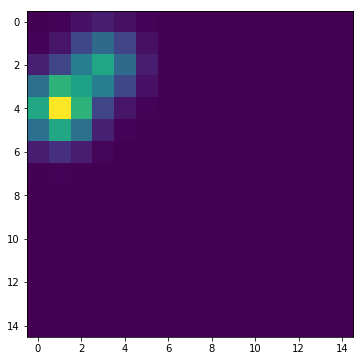

In [58]:
def make_fake_image(n_gaussians, 
                    psf_size   = 1.,         #arcsec 
                    image_size = 10,        #pixels 
                    buffer     = 5,         #pixels
                    background = 0.,         #uJy
                    flux_range = [10., 100], #uJy
                    depth      = 10.         #uJy
                   ):
    """
    Make a fake image with a given number of Gaussians
    
    Randomly choose n fluxes and put n Gaussians with those fluxes at 
    random positions
    
    Inputs
    ------
    
    Returns
    -------
    image: np.array
        2D array with n gaussians randomly placed around central pixel space
    """
    
    psf = Gaussian2DKernel(psf_size,x_size=101,y_size=101)
    
    image = np.full([image_size + buffer,image_size + buffer], 0.)
    
    for gal in np.arange(n_gaussians):
        gal_x = np.random.choice(np.arange(image_size))
        gal_y = np.random.choice(np.arange(image_size))
        gal_flux = np.random.uniform(flux_range[0],flux_range[1])
        image[gal_y, gal_x] = gal_flux
    
    image = convolve(image, psf)
    return image
    
    
    
plt.imshow(make_fake_image(2))

In [51]:
image = np.full([5,5], 0.)
flux_range = [10., 100]
image[np.random.choice(np.arange(4)), np.random.choice(np.arange(4))] = np.random.uniform(flux_range[0], flux_range[1])
image

array([[  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [ 55.00082807,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ]])

In [48]:
np.random.uniform(1.,5.)

3.72355426796266

In [24]:
image_size = 100
a = 1
for test in np.arange(10):
    print(np.random.uniform(5.,10.))
print(a)

8.69567683295435
7.41554214353363
7.7429810068403935
9.322505524548262
6.680516025522825
7.638578429283646
5.559000815854287
9.241319838101763
8.296939694032883
6.4700741818098635
1


In [27]:
np.random.uniform(5.,10.)

5.239290404381602

In [20]:
image[1,4] = 10.

In [21]:
image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

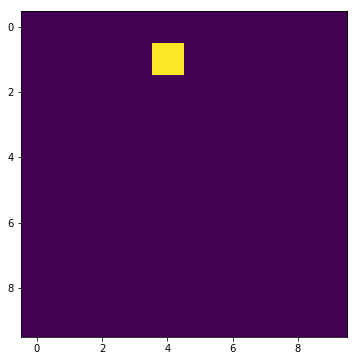

In [22]:
plt.imshow(image)

In [ ]:
hdulist = fits.open(GEP20_fits)
imGEP20phdu=hdulist[0].header
imGEP20hdu=hdulist[0].header

GEP20_pix_size = float(GEP_overview['pixel_size'][GEP_overview['waveband'] == 20]) / 3600.
GEP20_bandwidth = float(GEP_overview['bandwidth'][GEP_overview['waveband'] == 20])

#Create fake data for WCS solution
imGEP20hdu.set('META_1',  value = 250,             comment = '[] Wavelength of the array'    )                 
imGEP20hdu.set('EQUINOX', value = 2000.0,          comment = '[] WCS: Equinox of celestial pointing'  )        
imGEP20hdu.set('EPOCH',   value = 2000.0,          comment = '[] WCS: Epoch of celestial pointing'     )       
imGEP20hdu.set('CRVAL1',  value = 0.0,             comment = '[] R.A. (degrees) of reference pixel'    )       
imGEP20hdu.set('CRVAL2',  value = 0.0,             comment = '[] Declination of reference pixel'        )      
imGEP20hdu.set('CD1_1',   value = -GEP20_pix_size, comment = '[] [degrees] WCS: Pixel scale axis 1,1'   )      
imGEP20hdu.set('CD1_2',   value = 0.0,             comment = '[] [degrees] WCS: Pixel scale axis 1,2'   )      
imGEP20hdu.set('CD2_1',   value = 0.0,             comment = '[] [degrees] WCS: Pixel scale axis 2,1'   )      
imGEP20hdu.set('CD2_2',   value = GEP20_pix_size,  comment = '[] [degrees] WCS: Pixel scale axis 2,2'    )     
imGEP20hdu.set('CTYPE1',  value = 'RA---TAN',      comment = 'WCS: Projection type axis 1, default'     )      
imGEP20hdu.set('CTYPE2',  value = 'DEC--TAN',      comment = 'WCS: Projection type axis 1, default'       )    
imGEP20hdu.set('CRPIX1',  value = 0.0,             comment = '[] [pixel] WCS: Reference pixel position axis'  )                                                                  
imGEP20hdu.set('CRPIX2',  value = 0.0,             comment = ' [] [pixel] WCS: Reference pixel position axis' )

#Images are in Watts per metre squared and I want them in mJy


imGEP20 = (hdulist[0].data * 1.0E29) / GEP20_bandwidth #convert to mJy
#mean subtract
imGEP20mean = np.mean(imGEP20)
imGEP20  = imGEP20 - np.mean(imGEP20)
               
#Very crude first guess error = 6 uJy
nimGEP20 = imGEP20.copy()
nimGEP20.fill(6.e-3)
               
w_GEP20 = wcs.WCS(imGEP20hdu)
pixsizeGEP20=3600.0*w_GEP20.wcs.cd[1,1] #pixel size (in arcseconds)
del GEP20_pix_size #USE ARCSEC in PSF
hdulist.writeto('./data/GEP20_with_fake_wcs.fits', overwrite=True)
hdulist.close()